In [1]:
print("Hello")


Hello


In [1]:
a =3 
b = 4
print(a+b)

7


In [ ]:
a = 3
b = 4
print(a+b)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time # for throughput measurements

ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads

In [1]:
import tensorflow as tf

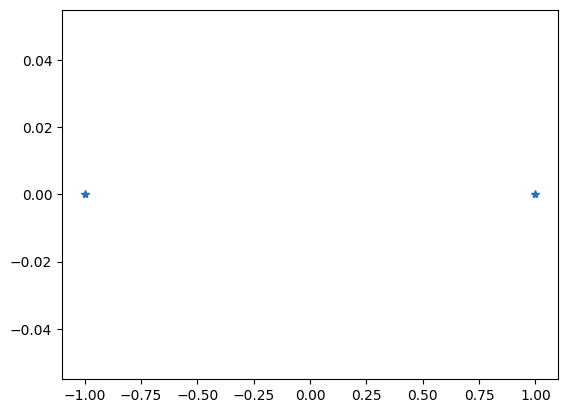

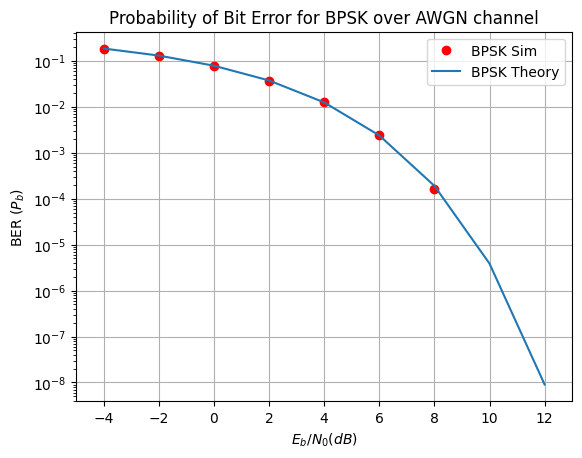

In [4]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4,stop = 13, step = 2) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True)
ax.legend();plt.show()